In [2]:
import os
import psycopg2
import pandas as pd
from dotenv import load_dotenv

load_dotenv()

conn = psycopg2.connect(os.getenv('DATABASE_URL'))

# Open a cursor to perform database operations
cur = conn.cursor()

# Execute a query
cur.execute("""
SELECT *, date_trunc('hour', timestamp) as hour FROM trades
order by timestamp desc
limit 20000
""")

# Retrieve query results
records = cur.fetchall()

# Convert to pandas DataFrame
df = pd.DataFrame(records, columns=[desc[0] for desc in cur.description])

# Close communication with the database
cur.close()
conn.close()

df

,signature,mint,timestamp,trades,token_volume,usd_volume,sol_volume,sells,token_spent,usd_got,sol_got,purchases,token_got,usd_spent,sol_spent,hour
0,5eb7p6KycrUnxaxTa7z5q5J5XtdyGhUHtuTq4D2CtVMwzd...,9gwTegFJJErDpWJKjPfLr2g2zrE3nL1v5zpwbtsk3c6P,2023-12-30 22:13:06,1,1.585212e+03,0.000000,1.442016,1,1.585212e+03,0.000000,1.442016,0,0.000000,0.0,0.000000,2023-12-30 22:00:00
1,3vdphmsoQM3ntuxPUZZjS6YKAqZXuxuKd83uDSnDDuBmkj...,9gwTegFJJErDpWJKjPfLr2g2zrE3nL1v5zpwbtsk3c6P,2023-12-30 22:12:52,1,5.454998e+01,0.000000,0.050006,0,0.000000e+00,0.000000,0.000000,1,54.549983,0.0,0.050006,2023-12-30 22:00:00
2,BAwwsgazRJZ6osE9rkphKoxcf11imCa3XpfP4dkgVSnPkV...,EsLVBSCqghAW1NJB2EWJyo5Cbsex55GRL9oCTaf7uKtZ,2023-12-30 22:12:47,1,4.231974e+10,33.079808,0.000000,1,4.231974e+10,33.079808,0.000000,0,0.000000,0.0,0.000000,2023-12-30 22:00:00
3,5tzPaQSVz59bAXqHWkBVpgM7e5TQCfkMyDJ3Mtq6pEkzFN...,2fEE4jwfvpyBaysHTEABFAbzSPzYui2cBCqdRDPFLMRW,2023-12-30 22:11:35,1,3.655140e+04,0.000000,1.864142,1,3.655140e+04,0.000000,1.864142,0,0.000000,0.0,0.000000,2023-12-30 22:00:00
4,58BgpwtQt4TvmKo7rVFmU6DgByxvMYyzEPufg8guMGt9Uk...,9gwTegFJJErDpWJKjPfLr2g2zrE3nL1v5zpwbtsk3c6P,2023-12-30 22:11:14,1,2.138372e+03,200.000000,0.000000,0,0.000000e+00,0.000000,0.000000,1,2138.371615,200.0,0.000000,2023-12-30 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,643bpejna9RM2xuqWCQJLcg9aYtMgqEMLrrAaARKFcZubW...,7iT1GRYYhEop2nV1dyCwK2MGyLmPHq47WhPGSwiqcUg5,2023-12-27 20:16:45,1,2.170586e+06,604.656910,0.000000,1,2.170586e+06,604.656910,0.000000,0,0.000000,0.0,0.000000,2023-12-27 20:00:00
19996,22yCRT9TsfS7oFhDz9NogqmC6RZazKNjvGJdDoTTFgMTCh...,F8qtcT3qnwQ24CHksuRrSELtm5k9ob8j64xAzj3JjsMs,2023-12-27 20:16:15,1,1.900000e+08,4.090202,0.000000,1,1.900000e+08,4.090202,0.000000,0,0.000000,0.0,0.000000,2023-12-27 20:00:00
19997,4dJDpYqTRmKsNLVdWtQHYw2G1GAY8ukb3jhh7Q8hkZZoKD...,GDfnEsia2WLAW5t8yx2X5j2mkfA74i5kwGdDuZHt7XmG,2023-12-27 20:16:08,1,2.142000e+03,2069.439573,0.000000,1,2.142000e+03,2069.439573,0.000000,0,0.000000,0.0,0.000000,2023-12-27 20:00:00
19998,4CseGpJd163sHsu46EKzf79svUcCm2MNpiV9mt1x8ZP5np...,3jiCmEi6DHgWHUaQMZk2NsyQffsjhtnY9nzjDMgjj6qF,2023-12-27 20:16:06,1,5.638250e+06,0.000000,0.997920,1,5.638250e+06,0.000000,0.997920,0,0.000000,0.0,0.000000,2023-12-27 20:00:00


In [3]:
# all uniq pairs of mint and hour
df['mint_hour'] = df['mint'] + df['hour'].astype(str)
df['mint_hour'].unique()

array(['9gwTegFJJErDpWJKjPfLr2g2zrE3nL1v5zpwbtsk3c6P2023-12-30 22:00:00',
       'EsLVBSCqghAW1NJB2EWJyo5Cbsex55GRL9oCTaf7uKtZ2023-12-30 22:00:00',
       '2fEE4jwfvpyBaysHTEABFAbzSPzYui2cBCqdRDPFLMRW2023-12-30 22:00:00',
       ...,
       '2x8o3hA5S5fBxCSE9hzVTf3RohcMWHqkDNKNEPuzprD52023-12-27 20:00:00',
       'F8qtcT3qnwQ24CHksuRrSELtm5k9ob8j64xAzj3JjsMs2023-12-27 20:00:00',
       '7atgF8KQo4wJrD5ATGX7t1V2zVvykPJbFfNeVf1icFv12023-12-27 20:00:00'],
      dtype=object)

In [4]:
# Removing rows where both usd_volume and sol_volume are 0
df = df[~((df['usd_volume'] == 0) & (df['sol_volume'] == 0))]
threashold_sol = 0.01
df_sol = df[(df['sol_volume'] > threashold_sol)]
df_sol

,signature,mint,timestamp,trades,token_volume,usd_volume,sol_volume,sells,token_spent,usd_got,sol_got,purchases,token_got,usd_spent,sol_spent,hour,mint_hour
0,5eb7p6KycrUnxaxTa7z5q5J5XtdyGhUHtuTq4D2CtVMwzd...,9gwTegFJJErDpWJKjPfLr2g2zrE3nL1v5zpwbtsk3c6P,2023-12-30 22:13:06,1,1.585212e+03,0.0,1.442016,1,1.585212e+03,0.0,1.442016,0,0.000000e+00,0.0,0.000000,2023-12-30 22:00:00,9gwTegFJJErDpWJKjPfLr2g2zrE3nL1v5zpwbtsk3c6P20...
1,3vdphmsoQM3ntuxPUZZjS6YKAqZXuxuKd83uDSnDDuBmkj...,9gwTegFJJErDpWJKjPfLr2g2zrE3nL1v5zpwbtsk3c6P,2023-12-30 22:12:52,1,5.454998e+01,0.0,0.050006,0,0.000000e+00,0.0,0.000000,1,5.454998e+01,0.0,0.050006,2023-12-30 22:00:00,9gwTegFJJErDpWJKjPfLr2g2zrE3nL1v5zpwbtsk3c6P20...
3,5tzPaQSVz59bAXqHWkBVpgM7e5TQCfkMyDJ3Mtq6pEkzFN...,2fEE4jwfvpyBaysHTEABFAbzSPzYui2cBCqdRDPFLMRW,2023-12-30 22:11:35,1,3.655140e+04,0.0,1.864142,1,3.655140e+04,0.0,1.864142,0,0.000000e+00,0.0,0.000000,2023-12-30 22:00:00,2fEE4jwfvpyBaysHTEABFAbzSPzYui2cBCqdRDPFLMRW20...
5,x8yJvS7woeA3WXeE33CxwFAYuqzJWKHEL5Bf5BdqxxF9ZX...,J34usKXUTz4aCanKftng4H3Szo2xg2hDbPFs5nsQ7adq,2023-12-30 22:10:38,1,1.469839e+06,0.0,1.184168,1,1.469839e+06,0.0,1.184168,0,0.000000e+00,0.0,0.000000,2023-12-30 22:00:00,J34usKXUTz4aCanKftng4H3Szo2xg2hDbPFs5nsQ7adq20...
8,22C2oFuJX3Kyorv1gbBBxFZciaHyc5uQXCb4aukMVuUeS7...,5z3EqYQo9HiCEs3R84RCDMu2n7anpDMxRhdK8PSWmrRC,2023-12-30 22:09:29,1,5.535115e+03,0.0,0.600005,0,0.000000e+00,0.0,0.000000,1,5.535115e+03,0.0,0.600005,2023-12-30 22:00:00,5z3EqYQo9HiCEs3R84RCDMu2n7anpDMxRhdK8PSWmrRC20...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19991,4HpRnDwLQw7pBzPmR8YNnEQhHykzjFDR7bCQWBybfPYD1y...,8vRnnknwERunJEEDtEFoxzaxbxGnEY61FPbx8uTVKsUD,2023-12-27 20:17:37,1,1.128160e+06,0.0,0.149057,1,1.128160e+06,0.0,0.149057,0,0.000000e+00,0.0,0.000000,2023-12-27 20:00:00,8vRnnknwERunJEEDtEFoxzaxbxGnEY61FPbx8uTVKsUD20...
19992,2D513jjXbF1gjpdFvRp5XT2xX8VQSUhKupgaPL7WYNK1u5...,DezXAZ8z7PnrnRJjz3wXBoRgixCa6xjnB7YaB1pPB263,2023-12-27 20:17:34,1,1.401000e+08,0.0,19.098093,0,0.000000e+00,0.0,0.000000,1,1.401000e+08,0.0,19.098093,2023-12-27 20:00:00,DezXAZ8z7PnrnRJjz3wXBoRgixCa6xjnB7YaB1pPB26320...
19994,5yWH22TaLUWFF2rrC8RqhGLYuXePKNV4HKoAraDsxEBsC9...,2x8o3hA5S5fBxCSE9hzVTf3RohcMWHqkDNKNEPuzprD5,2023-12-27 20:17:29,1,5.000000e+04,0.0,1.365179,1,5.000000e+04,0.0,1.365179,0,0.000000e+00,0.0,0.000000,2023-12-27 20:00:00,2x8o3hA5S5fBxCSE9hzVTf3RohcMWHqkDNKNEPuzprD520...
19998,4CseGpJd163sHsu46EKzf79svUcCm2MNpiV9mt1x8ZP5np...,3jiCmEi6DHgWHUaQMZk2NsyQffsjhtnY9nzjDMgjj6qF,2023-12-27 20:16:06,1,5.638250e+06,0.0,0.997920,1,5.638250e+06,0.0,0.997920,0,0.000000e+00,0.0,0.000000,2023-12-27 20:00:00,3jiCmEi6DHgWHUaQMZk2NsyQffsjhtnY9nzjDMgjj6qF20...


In [5]:
df_sol_clean = df_sol.drop(['signature','mint_hour','usd_volume','usd_spent','usd_got'],axis=1)
# for each unique pair of mint and hour calculate average token_volume
df_grouped = df_sol_clean.groupby(['mint','hour']).mean()
df_grouped

timestamp  \
mint                                         hour                                      
12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM 2023-12-27 21:00:00 2023-12-27 21:40:58   
                                             2023-12-28 00:00:00 2023-12-28 00:26:21   
                                             2023-12-28 04:00:00 2023-12-28 04:05:07   
                                             2023-12-28 11:00:00 2023-12-28 11:53:55   
                                             2023-12-28 12:00:00 2023-12-28 12:41:00   
...                                                                              ...   
zAaZYjcakDKqAm9rsxR2BjCqYLVjnPHW5oK4xtZdL8L  2023-12-28 03:00:00 2023-12-28 03:37:54   
                                             2023-12-28 04:00:00 2023-12-28 04:00:17   
zNziqUmrdQchP8C7CZkukrJXL9kWu8XsSbAzcAB45KM  2023-12-29 08:00:00 2023-12-29 08:42:56   
zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF  2023-12-28 02:00:00 2023-12-28 02:38:24   
                                             2023-12-29 12:00:00 2023-12-29 12:54:41   

                                                                  trades  \
mint                                         hour                          
12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM 2023-12-27 21:00:00     1.0   
                                             2023-12-28 00:00:00     1.0   
                                             2023-12-28 04:00:00     1.0   
                                             2023-12-28 11:00:00     1.0   
                                             2023-12-28 12:00:00     1.0   
...                                                                  ...   
zAaZYjcakDKqAm9rsxR2BjCqYLVjnPHW5oK4xtZdL8L  2023-12-28 03:00:00     1.0   
                                             2023-12-28 04:00:00     1.0   
zNziqUmrdQchP8C7CZkukrJXL9kWu8XsSbAzcAB45KM  2023-12-29 08:00:00     1.0   
zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF  2023-12-28 02:00:00     1.0   
                                             2023-12-29 12:00:00     1.0   

                                                                  token_volume  \
mint                                         hour                                
12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM 2023-12-27 21:00:00  1.471510e+10   
                                             2023-12-28 00:00:00  3.294886e+10   
                                             2023-12-28 04:00:00  3.907064e+10   
                                             2023-12-28 11:00:00  4.287068e+09   
                                             2023-12-28 12:00:00  1.199266e+11   
...                                                                        ...   
zAaZYjcakDKqAm9rsxR2BjCqYLVjnPHW5oK4xtZdL8L  2023-12-28 03:00:00  2.657380e+03   
                                             2023-12-28 04:00:00  1.454696e+04   
zNziqUmrdQchP8C7CZkukrJXL9kWu8XsSbAzcAB45KM  2023-12-29 08:00:00  6.946423e+05   
zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF  2023-12-28 02:00:00  2.009042e+02   
                                             2023-12-29 12:00:00  3.000000e+04   

                                                                  sol_volume  \
mint                                         hour                              
12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM 2023-12-27 21:00:00    0.249302   
                                             2023-12-28 00:00:00    0.500145   
                                             2023-12-28 04:00:00    0.514537   
                                             2023-12-28 11:00:00    0.060007   
                                             2023-12-28 12:00:00    1.500145   
...                                                                      ...   
zAaZYjcakDKqAm9rsxR2BjCqYLVjnPHW5oK4xtZdL8L  2023-12-28 03:00:00    0.351013   
                                             2023-12-28 04:00:00    1.000007   
zNziqUmrdQchP8C7CZkukrJXL9kWu8XsSbAzcAB45KM  2023-12-29 08:00:00    0.0161

In [6]:
token_avg_price_sol = df_grouped['sol_volume'] / df_grouped['token_volume']
token_avg_price_sol

mint                                          hour               
12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM  2023-12-27 21:00:00    1.694189e-11
                                              2023-12-28 00:00:00    1.517943e-11
                                              2023-12-28 04:00:00    1.316941e-11
                                              2023-12-28 11:00:00    1.399714e-11
                                              2023-12-28 12:00:00    1.250886e-11
                                                                         ...     
zAaZYjcakDKqAm9rsxR2BjCqYLVjnPHW5oK4xtZdL8L   2023-12-28 03:00:00    1.320898e-04
                                              2023-12-28 04:00:00    6.874334e-05
zNziqUmrdQchP8C7CZkukrJXL9kWu8XsSbAzcAB45KM   2023-12-29 08:00:00    2.325413e-08
zebeczgi5fSEtbpfQKVZKCJ3WgYXxjkMUkNNx7fLKAF   2023-12-28 02:00:00    8.298602e-05
                                              2023-12-29 12:00:00    7.928006e-05
Length: 5873, dtype: float64

<Axes: xlabel='hour'>

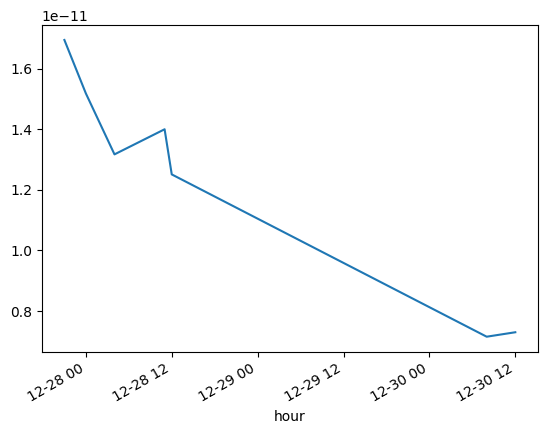

In [7]:
import matplotlib.pyplot as plt
# time gap between trades in hours
token_avg_price_sol['12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM',:].index.to_series().diff().dt.total_seconds() / 3600
df_token1 = token_avg_price_sol['12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM',:]
df_token1.plot()

/var/folders/f0/pkklpwzn60qgw7s040tqnts80000gn/T/ipykernel_11374/4248839625.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features = df_features.join([df_token1], how='outer').fillna(method='ffill').fillna(0)


<Axes: >

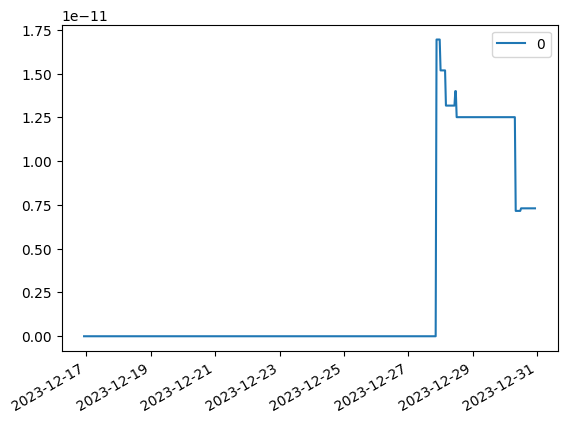

In [15]:
from datetime import datetime, timedelta

# Create a DateTime index from two weeks ago to now, hourly
date_end = datetime.now()
date_start = date_end - timedelta(weeks=2)
date_range = pd.date_range(start=date_start, end=date_end, freq='H')

# Create the empty DataFrame with this DateTime index
df_features = pd.DataFrame(index=date_range)


# Merging the data from df_token1, df_token2, etc. into df_features
# Using an outer join to keep all timestamps and fill missing values with NaN
# Then forward fill NaNs and replace remaining NaNs with 0
df_features = df_features.join([df_token1], how='outer').fillna(method='ffill').fillna(0)

df_features.plot()


In [55]:
from datetime import datetime, timedelta

# Get current time and round down to the nearest hour
date_end = datetime.now().replace(minute=0, second=0, microsecond=0)
date_start = date_end - timedelta(days=7)

# Create a DateTime index from n days ago to the rounded current time, hourly
date_range = pd.date_range(start=date_start, end=date_end, freq='H')

# Create the empty DataFrame with this DateTime index
df_features = pd.DataFrame(index=date_range)


# Process each 'mint_name' to create df_token1, df_token2, etc.
mint_names = token_avg_price_sol.index.get_level_values('mint').unique()
for mint_name in mint_names:
    # Selecting data for each mint_name
    df_token = token_avg_price_sol.loc[mint_name]

    # Ensure the DataFrame has the same index as df_features
    df_token = df_token.reindex(date_range, fill_value=0)

    # Add this data to df_features
    df_features[mint_name] = df_token

df_features.T


/var/folders/f0/pkklpwzn60qgw7s040tqnts80000gn/T/ipykernel_11374/847645680.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features[mint_name] = df_token
/var/folders/f0/pkklpwzn60qgw7s040tqnts80000gn/T/ipykernel_11374/847645680.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features[mint_name] = df_token
/var/folders/f0/pkklpwzn60qgw7s040tqnts80000gn/T/ipykernel_11374/847645680.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has 

,2023-12-23 23:00:00,2023-12-24 00:00:00,2023-12-24 01:00:00,2023-12-24 02:00:00,2023-12-24 03:00:00,2023-12-24 04:00:00,2023-12-24 05:00:00,2023-12-24 06:00:00,2023-12-24 07:00:00,2023-12-24 08:00:00,...,2023-12-30 14:00:00,2023-12-30 15:00:00,2023-12-30 16:00:00,2023-12-30 17:00:00,2023-12-30 18:00:00,2023-12-30 19:00:00,2023-12-30 20:00:00,2023-12-30 21:00:00,2023-12-30 22:00:00,2023-12-30 23:00:00
12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
12FvihLoAzTtaA98YVuErGftCXtoc83t3YFk4WdKK79T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.883452e-07,7.906549e-07,0.000002,0.000002,9.322123e-07,0.0,0.0,0.0,0.0
14XjUqKSNgpQ2ZQ1QgqRf66o5ZkUNfBUHe3P5E3V4oHX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
1o1ig9Jodj7CrxXdbZc5T2GUncY8E8mrWxqQGaWQTee,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
21kbezaCxz9dG2NtXp7pW1hAmtKe6ykiJkeT1EiGXDyY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxxxa1sKNGwFtw2kFn8XauW9xq8hBZ5kVtcSesTT9fW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
ygnxVSoD8y7a2mbiEM2AwMADL3WVN3Xa4jWEhnxPE4h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
zAaZYjcakDKqAm9rsxR2BjCqYLVjnPHW5oK4xtZdL8L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
zNziqUmrdQchP8C7CZkukrJXL9kWu8XsSbAzcAB45KM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0


In [46]:
from datetime import datetime, timedelta

# And mint_names are the unique mint values from df
mint_names = token_avg_price_sol.index.get_level_values('mint').unique()
trade_times = token_avg_price_sol.index.get_level_values('hour')


# Initialize df_features_1d with mint_names as rows and 'hour' as the first column
df_features_1d = pd.DataFrame(index=mint_names, columns=['hour'])

# Populate the 'hour' column for each mint_name
for mint_name in mint_names:
    for time in trade_times:

        # Determine time_end and date_end for each mint_name
        time_end = time
        date_start = time_end - timedelta(days=1)

        # Set the 'hour' column for this mint_name
        df_features_1d.at[mint_name, 'hour'] = time_end.strftime('%Y-%m-%d %H:00:00')

        #Create a DateTime index from n days ago to time_end, hourly
        date_range = pd.date_range(start=date_start, end=date_end, freq='H')

        # Create the empty DataFrame with this DateTime index
        df_features = pd.DataFrame(index=date_range)

        # Extract data for this mint_name from token_avg_price_sol and transpose it
        df_token = token_avg_price_sol.loc[mint_name]
        df_token = df_token.reindex(date_range, fill_value=0).T

        # Add this transposed data to df_features_1d
        df_features_1d = df_features_1d.join(df_token, how='left')
        df_features_1d = df_features_1d.join([df_token], how='outer').fillna(method='ffill').fillna(0)

# Note: The above code assumes that the df_token DataFrames are properly aligned with df_features_1d
df_features_1d


ValueError: Other Series must have a name

In [51]:
df_token

2023-12-26 21:00:00    0.0
2023-12-26 22:00:00    0.0
2023-12-26 23:00:00    0.0
2023-12-27 00:00:00    0.0
2023-12-27 01:00:00    0.0
                      ... 
2023-12-30 18:00:00    0.0
2023-12-30 19:00:00    0.0
2023-12-30 20:00:00    0.0
2023-12-30 21:00:00    0.0
2023-12-30 22:00:00    0.0
Freq: H, Length: 98, dtype: float64

In [42]:
token_avg_price_sol['12AjTG16m3oWzjVy2kP2C1bUEzZv8PayQDM9csRR1obM',time_end]

1.6941885400165166e-11